## 4. Pair Trading

股市无法做空，只能满仓和空仓操作。

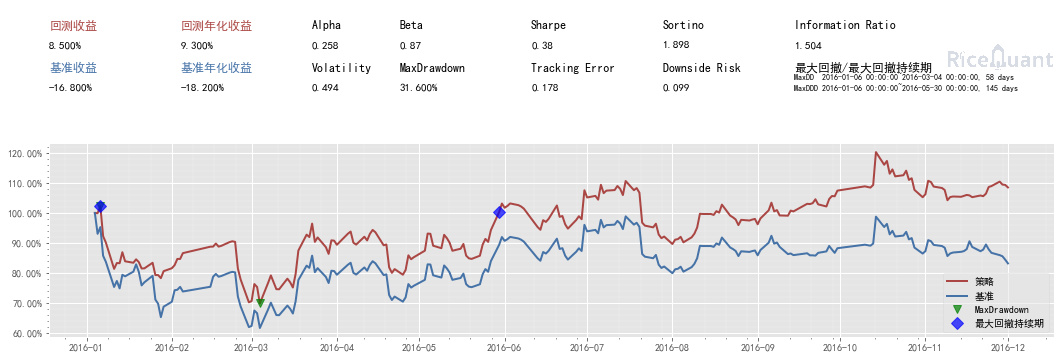

{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2016-01-04   22.96      99977.04                  1.000    100000.00   
  2016-01-05   22.96      93032.28                  1.000     93055.24   
  2016-01-06   22.96      95266.98                  0.931     95289.94   
  2016-01-07   22.96      85743.72                  0.953     85766.68   
  2016-01-08   22.96      83715.30                  0.858     83738.26   
  2016-01-11   22.96      75360.96                  0.837     75383.92   
  2016-01-12   22.96      77355.00                  0.754     77377.96   
  2016-01-13   22.96      74879.64                  0.774     74902.60   
  2016-01-14   22.96      79417.80                  0.749     79440.76   
  2016-01-15   22.96      78902.10                  0.794     78925.06   
  2016-01-18   22.96      80449.20                  0.789     80472.16   

In [4]:
# coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """

import rqalpha
from rqalpha.api import *
from fxdayu_data import DataAPI
from datetime import datetime, timedelta
import numpy as np

def init(context):
    context.s1 = '002290.XSHE'
    context.s2 = '002508.XSHE'

def handle_bar(context, bar_dict):
    his1 = history_bars(context.s1, 50, '1d', 'close')
    his2 = history_bars(context.s2, 50, '1d', 'close')
    beta, alpha = np.polyfit(his1,his2,1)
    spread = his2 - (beta*his1+alpha)
    z_score = (spread-spread.mean())/spread.std()
    print z_score

    try:
        if z_score[-1]>1:
            order_target_percent(context.s1, 1)
            order_target_percent(context.s2, 0)
        elif z_score[-1]<-1:
            order_target_percent(context.s2, 1)
            order_target_percent(context.s1, 0)
    except KeyError:
        pass
"""

config = {
    "base": {
        "start_date": "2016-01-01",
        "end_date": "2016-12-01",
        "securities": ['stock'],
        "stock_starting_cash": 100000,
        "benchmark": "002290.XSHE"
    },
    "extra": {
        "log_level": "verbose",
    },
    "mod": {
        "sys_analyser": {
            "enabled": True,
            "plot": True
        },
        "sys_risk": {
            "validate_position": True,
            "enabled": True
        }}}

run_code(code, config)
